<a href="https://colab.research.google.com/github/SelvamathanS/Eye-state-classification/blob/main/Snow_flake.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!pip install snowflake-connector-python

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 79.0/79.0 kB 2.4 MB/s eta 0:00:00
INFO: pip is looking at multiple versions of pyopenssl to determine which version is compatible with other requirements. This could take a while.
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.9/2.9 MB 35.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 105.0/105.0 kB 8.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 140.6/140.6 kB 9.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 14.6/14.6 MB 102.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.5/4.5 MB 112.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 57.3/57.3 kB 4.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 86.8/86.8 kB 5.8 MB/s eta 0:00:00
  Attempting uninstall: cryptography
    Found existing installation: cryptography 43.0.3
    Uninstalling cryptography-43.0.3:
      Successfully uninstalled cryptography-43.0.3
  Attempting uninstall: pyOpenSSL
    Found 

***Eye State Classification in SnowFlake using eye detection dataset***

In [8]:
import pandas as pd
import numpy as np
import snowflake.connector

con = snowflake.connector.connect(
    user = 'Selvamathans',
    password = 'Selvamathan@3006',
    account = 'QFHKGYE-AO38181', #account identifier
    warehouse = 'COMPUTE_WH', #ware house name
    database = 'EYE',
    schema = 'PUBLIC'
)

In [9]:
query = 'SELECT * from "EYE"'
d = pd.read_sql(query, con)
con.close()

/tmp/ipython-input-4018992162.py:2: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  d = pd.read_sql(query, con)


,AF3,F7,F3,FC5,T7,P7,O1,O2,P8,T8,FC6,F4,F8,AF4,EYEDETECTION
0,4329.23,4009.23,4289.23,4148.21,4350.26,4586.15,4096.92,4641.03,4222.05,4238.46,4211.28,4280.51,4635.90,4393.85,0
1,4324.62,4004.62,4293.85,4148.72,4342.05,4586.67,4097.44,4638.97,4210.77,4226.67,4207.69,4279.49,4632.82,4384.10,0
2,4327.69,4006.67,4295.38,4156.41,4336.92,4583.59,4096.92,4630.26,4207.69,4222.05,4206.67,4282.05,4628.72,4389.23,0
3,4328.72,4011.79,4296.41,4155.90,4343.59,4582.56,4097.44,4630.77,4217.44,4235.38,4210.77,4287.69,4632.31,4396.41,0
4,4326.15,4011.79,4292.31,4151.28,4347.69,4586.67,4095.90,4627.69,4210.77,4244.10,4212.82,4288.21,4632.82,4398.46,0


In [11]:
d.tail()

,AF3,F7,F3,FC5,T7,P7,O1,O2,P8,T8,FC6,F4,F8,AF4,EYEDETECTION
14975,4281.03,3990.26,4245.64,4116.92,4333.85,4614.36,4074.87,4625.64,4203.08,4221.54,4171.28,4269.23,4593.33,4340.51,1
14976,4276.92,3991.79,4245.13,4110.77,4332.82,4615.38,4073.33,4621.54,4194.36,4217.44,4162.56,4259.49,4590.26,4333.33,1
14977,4277.44,3990.77,4246.67,4113.85,4333.33,4615.38,4072.82,4623.59,4193.33,4212.82,4160.51,4257.95,4591.79,4339.49,1
14978,4284.62,3991.79,4251.28,4122.05,4334.36,4616.41,4080.51,4628.72,4200.00,4220.00,4165.64,4267.18,4596.41,4350.77,1
14979,4287.69,3997.44,4260.00,4121.03,4333.33,4616.41,4088.72,4638.46,4212.31,4226.67,4167.69,4274.36,4597.95,4350.77,1


# ***KNN***

In [113]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import StandardScaler, Normalizer, MinMaxScaler

In [114]:
d.isna().sum()

,0
AF3,0
F7,0
F3,0
FC5,0
T7,0
P7,0
O1,0
O2,0
P8,0
T8,0


In [115]:
norm  = Normalizer()

In [116]:
scaler = StandardScaler()

In [117]:
minmax = MinMaxScaler()

In [118]:
x = d.drop('EYEDETECTION', axis = 1)
y = d['EYEDETECTION']

In [119]:
x = norm.fit_transform(x)

In [120]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.2, random_state = 42)
x_train.shape, x_test.shape

((11984, 14), (2996, 14))

In [121]:
knn = KNeighborsClassifier(n_neighbors = 5)
knn.fit(x_train, y_train)

KNeighborsClassifier()

In [122]:
y_pred = knn.predict(x_test)

In [123]:
knn_acc = accuracy_score(y_test, y_pred)
knn_acc

0.9712950600801068

# ***Naive Bayes***

In [124]:
from sklearn.naive_bayes import GaussianNB

In [125]:
x = d.drop('EYEDETECTION', axis = 1)
y = d['EYEDETECTION']

In [126]:
x = minmax.fit_transform(x)

In [127]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.2, random_state = 42)
x_train.shape, x_test.shape

((11984, 14), (2996, 14))

In [128]:
gb = GaussianNB()
gb.fit(x_train, y_train)

GaussianNB()

In [129]:
y_pred = gb.predict(x_test)

In [130]:
nb_acc = accuracy_score(y_test, y_pred)
nb_acc

0.4679572763684913

# ***Logistic Regression***

In [131]:
from sklearn.linear_model import LogisticRegression

In [132]:
x = d.drop('EYEDETECTION', axis = 1)
y = d['EYEDETECTION']

In [133]:
# x = scaler.fit_transform(x)

In [134]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.2, random_state = 42)
x_train.shape, x_test.shape

((11984, 14), (2996, 14))

In [135]:
lr = LogisticRegression()
lr.fit(x_train, y_train)

/usr/local/lib/python3.12/dist-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [136]:
y_pred = lr.predict(x_test)

In [137]:
lr_acc = accuracy_score(y_test, y_pred)
lr_acc

0.6238317757009346

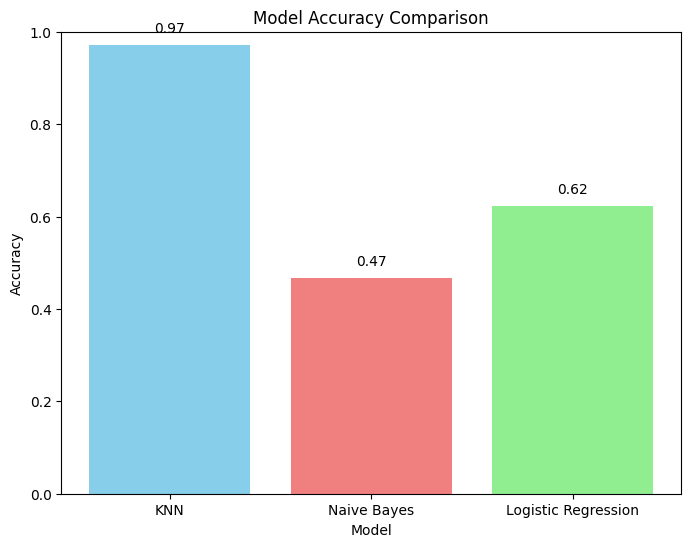

In [138]:
import matplotlib.pyplot as plt
import pandas as pd

accuracies = {
    'Model': ['KNN', 'Naive Bayes', 'Logistic Regression'],
    'Accuracy': [knn_acc, nb_acc, lr_acc]
}

acc_df = pd.DataFrame(accuracies)

plt.figure(figsize=(8, 6))
plt.bar(acc_df['Model'], acc_df['Accuracy'], color=['skyblue', 'lightcoral', 'lightgreen'])
plt.xlabel('Model')
plt.ylabel('Accuracy')
plt.title('Model Accuracy Comparison')
plt.ylim(0, 1)
for i, v in enumerate(acc_df['Accuracy']):
    plt.text(i, v + 0.02, f'{v:.2f}', ha='center', va='bottom')
plt.show()